# Building Neural Network

## Import Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate random input data 

In [65]:
observations = 10000
xs = np.random.uniform(low= -10,high=10,size=(observations,1))
# size = n (number of observations) * k (number of variables)
zs = np.random.uniform(low= -10,high=10,size=(observations,1))

inputs = np.column_stack((xs,zs)) 
print(f"xs shape = {xs.shape}")
print(f"zs shape = {zs.shape}")

xs shape = (10000, 1)
zs shape = (10000, 1)


In [66]:
inputs.shape

(10000, 2)

## Create Target <br>
target  : f(x,z) = 7*x + 9*z - 10 + noise 


In [67]:
# Real data tu pasti ga bakal bener bener bersih, bakal ada noisenya.
# Makanya kita buat noise ini biar bisa miripin sama real data
noise = np.random.uniform(-1,1,(observations,1))

# targets = 7 * xs + 9 * zs - 10 + noise
targets = 13 * xs + 7 * zs - 12 + noise
print(targets.shape)

(10000, 1)


## Plot the Training Data

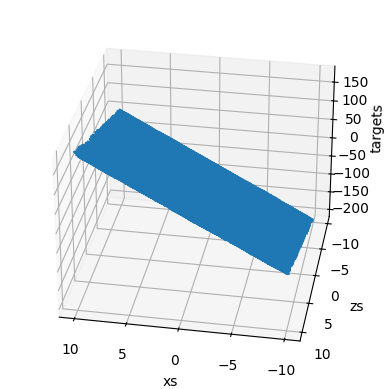

In [68]:
# targets = targets.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('targets')
ax.view_init(azim=100)
plt.show()
# targets = targets.reshape(observations,1)

## Initialize Variables

In [69]:
init_range = 0.1
weights = np.random.uniform(-init_range,init_range,size=(2,1))
biases = np.random.uniform(-init_range,init_range,size=1)

## Set a Learning Rate

In [70]:
learning_rate = 0.05

## Train the Model <br>

Plan for each iteration : <br>
- Calculate outputs <br>
- Compare outputs to target through the loss <br>
- Print the loss <br>
- Adjust weights and biasesd

In [71]:
for i in range(100):
    outputs = np.dot(inputs,weights) + biases
    # di sini inputs  ukuran 1000 x 2
    # weigths : 2 x 1
    # ukuran outputnya adalah matrix 1000 x 1
    # Biasesnya scalar

    deltas  = outputs - targets # ini buat track record loss function

    # loss = np.sum(deltas ** 2) / 2 / observations
    loss = np.sum(deltas ** 2) / observations
    # lossnya pake L2-Norm (OLS)
    # bagi dua biar elegan katanya awikwok
    # bagi observation karena (Loss / Observations  = Mean (Average) Loss)
    # kita bagi dua sama bagi observation ga ngubah konsep lossnya kok gan

    print(loss)

    deltas_scaled  = deltas / observations

    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)


7412.213557024741
3351.500780579108
1547.9453807187444
742.5382793141589
379.5520659009766
213.27612078021727
134.8627083776256
95.98299566950675
75.11666113848808
62.642704882094826
54.23395279271329
47.92490934012835
42.80745843536919
38.44931082208621
34.63399781708321
31.24423605278888
28.209373709793056
25.481556966447567
23.02480955145157
20.809941530236706
18.812103954545535
17.00955435359822
15.382983772983641
13.915110177068328
12.590403113416544
11.39487716167756
10.31592477739043
9.342174301623958
8.463365910977648
7.670241560179313
6.954446536984193
6.308441026261195
5.725420488475082
5.199243891125974
4.72436897979235
4.295793880068405
3.9090044026369024
3.5599264904805934
3.2448833045436585
2.9605564944946257
2.703951246023738
2.472364736218179
2.26335766461262
2.074728559983672
1.9044905922292252
1.750850645076783
1.6121904291860552
1.4870494367066647
1.3741095577497047
1.2721811967374947
1.1801907423948217
1.0971692594027953
1.0222422826044677
0.9546206062646537
0.89359

## Recheck

In [72]:
print(weights,biases)

[[12.9995832 ]
 [ 7.00066911]] [-11.92320827]


## Plot the target and the output

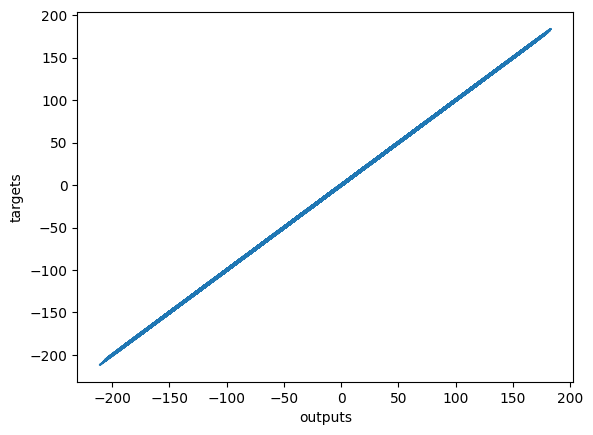

In [73]:
plt.plot(outputs,targets)
plt.xlabel("outputs")
plt.ylabel("targets")
plt.show()